<a href="https://colab.research.google.com/github/UW-CTRL/AA548-spr2024/blob/main/homework/hw3_problem2_helper_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [524]:
import numpy as np
import matplotlib.pyplot as plt

In [583]:

def plot_95_ellipse(mean, covariance, color="black"):
    chi_95 = 5.991
    #chi_95 = 0.1
    mean = np.array([[mean[0]],[mean[1]]])
    val, rot = np.linalg.eig(covariance)
    val = np.sqrt(val * chi_95)
    t = np.linspace(0, 2.0 * np.pi, 1000)
    xy = np.stack((np.cos(t), np.sin(t)), axis=-1)
    
    plt.plot(*(rot @ (val * xy).T + mean), c=color)
    plt.fill(*(rot @ (val * xy).T + mean), alpha=0.3, c=color)

Below, is an example of how to plot ellipses, and also how to plot ellipses emanating from a (velocity) vector starting from points along a trajectory.

In [526]:
N = 20
x = np.arange(20) * 3
# generate mean velocities and covariances
mean_velocity = np.stack([5*np.cos(0.2 * x), 5*np.sin(0.2 * x)], 1)
covariance_velocity = []
for i in range(N):
    p = np.random.rand(2,2) * 0.5
    covariance_velocity += [p + p.T + np.diag([.5, .5])]

# generate position trajectory
positions = np.stack([x,  x**1.2], 1)

[[0.94026042 0.74896912]
 [0.74896912 0.81678821]]
[[0.51137783 0.66655817]
 [0.66655817 1.15145842]]
[[0.92263778 0.48466991]
 [0.48466991 1.33243745]]
[[0.68680982 0.49199077]
 [0.49199077 0.80490475]]
[[0.62586531 0.42398258]
 [0.42398258 0.62078688]]
[[1.10791118 0.3868641 ]
 [0.3868641  1.02749812]]
[[1.17926635 0.41412906]
 [0.41412906 0.78264226]]
[[1.19348231 0.5320397 ]
 [0.5320397  1.02219781]]
[[1.03071761 0.88046279]
 [0.88046279 1.16370348]]
[[1.04540516 0.45323097]
 [0.45323097 1.22326472]]
[[0.68711941 0.33290296]
 [0.33290296 1.04469327]]
[[1.01719897 0.11696803]
 [0.11696803 1.02076915]]
[[0.72616562 0.43967362]
 [0.43967362 0.62876398]]
[[1.17995931 0.70597693]
 [0.70597693 1.00023427]]
[[1.09966729 0.53767276]
 [0.53767276 0.73730034]]
[[0.67544704 0.6494536 ]
 [0.6494536  0.52636494]]
[[0.92294993 0.40720879]
 [0.40720879 1.33171622]]
[[1.03976165 0.29724373]
 [0.29724373 0.96006353]]
[[1.31906433 0.30973015]
 [0.30973015 1.20393528]]
[[0.96588894 0.97207123]
 [0.97

/tmp/ipykernel_53475/1552254702.py:6: RuntimeWarning: invalid value encountered in sqrt
  val = np.sqrt(val * chi_95)
/tmp/ipykernel_53475/1552254702.py:6: RuntimeWarning: invalid value encountered in sqrt
  val = np.sqrt(val * chi_95)


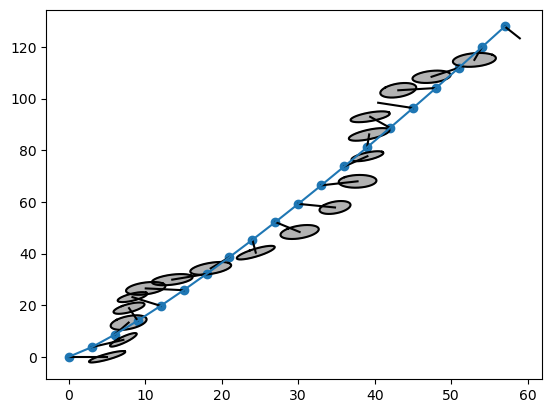

In [527]:

for (i,(u,v,p)) in enumerate(zip(mean_velocity, covariance_velocity, positions)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p+u, v)
    plt.plot([p[0],p[0]+u[0]], [p[1],p[1]+u[1]], c="black")

plt.plot(positions[:,0], positions[:,1])
plt.scatter(positions[:,0], positions[:,1])


In [598]:
dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0, 0], [0, 0], [dt, 0], [0, dt]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])

initial_state = np.array([1000, 0, 0, 50])

states = [initial_state]
controls = []
output = []
t = 0
t0 = t 

for i in range(60): 
    controls.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states.append(A @ states[i] + B @ controls[i] )
    output.append(C @ states[i])
    t += dt

controls = np.stack(controls)
states = np.stack(states)
output = np.stack(output)



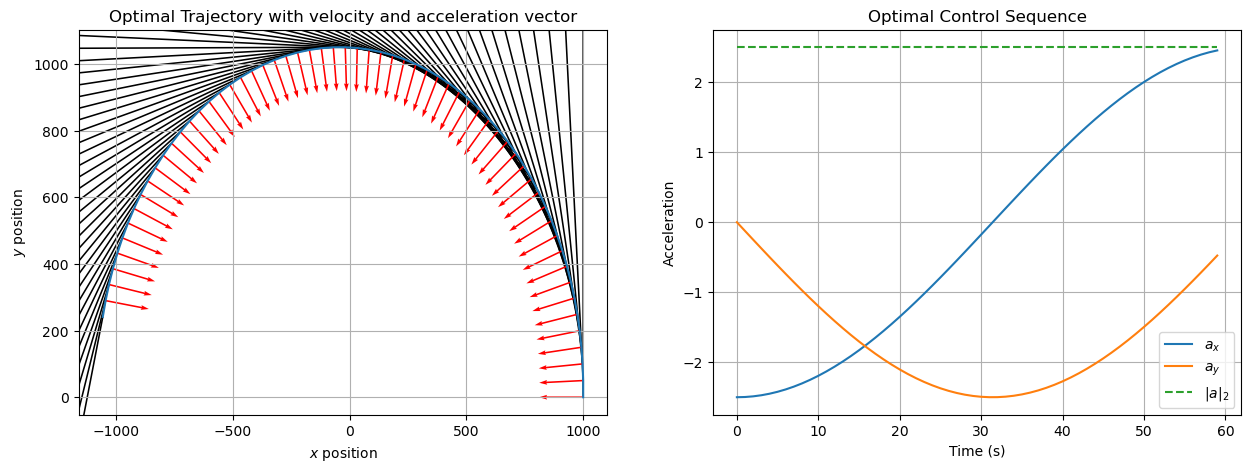

In [599]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Optimal Trajectory with velocity and acceleration vector")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

In [600]:
dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0.5*dt**2, 0], [0, 0.5*dt**2], [dt, 0], [0, dt]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])

Q = np.diag([0,0,1,1])
R = 9*np.diag([1,1])
mean = np.array([0,0,0,0])
meany = np.array([0,0])


initial_state = np.array([1000, 0, 0, 50])

states = [initial_state]
controls = []
output = []
t = 0
t0 = t 

for i in range(60):
    W = np.random.multivariate_normal(mean, Q,)
    V = np.random.multivariate_normal(meany, R,) 
    controls.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states.append(A @ states[i] + B @ controls[i] + W )
    output.append(C @ states[i] + V  )
    t += dt

controls = np.stack(controls)
states = np.stack(states)
output = np.stack(output)



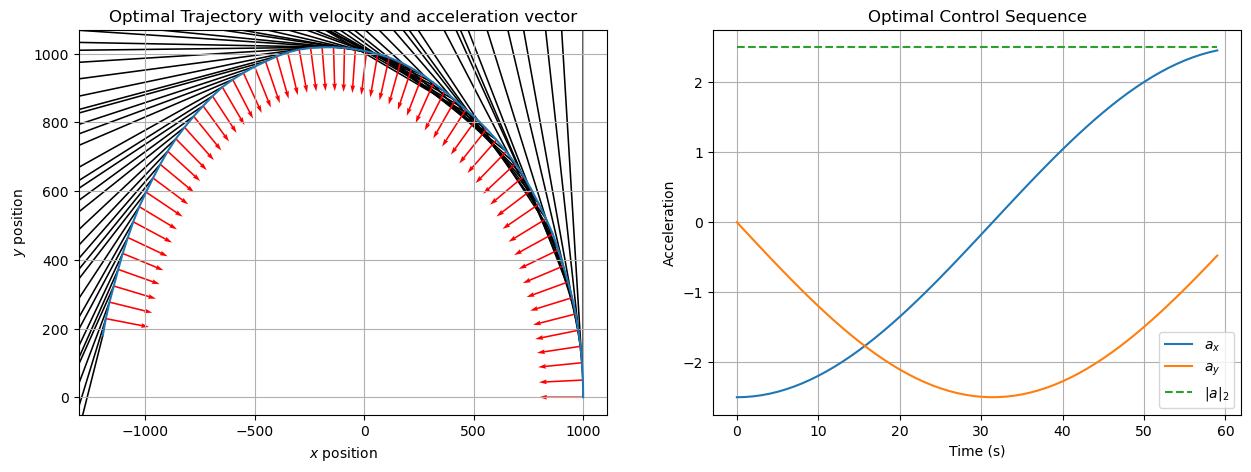

In [601]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Optimal Trajectory with velocity and acceleration vector")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

In [602]:
def KF(AA, BB, CC, UU, YY, QIN, RIN, mu0, sigma0):
        
        I = np.diag([1,1,1,1])
        
        mup = AA @ mu0 + BB @ UU
        sigmap = AA @ sigma0 @ AA.T + QIN

        k = sigmap @ CC.T @ inv((CC @ sigmap @ CC.T + RIN))
        munext = mup + k @ ( YY - CC @ mup)
        sigmanext = (I - k @ CC ) @ sigmap
        return k, munext, sigmanext 

In [604]:
QK = np.diag([0, 0, 1, 1])
RK = np.diag([9, 9])

In [605]:
dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0.5*dt**2, 0], [0, 0.5*dt**2], [dt, 0], [0, dt]])
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])

Q = np.diag([0,0,1,1])
R = 9*np.diag([1,1])
mean = np.array([0,0,0,0])
meany = np.array([0,0])


initial_state = np.array([1500, 100, 0, 55])

states = [initial_state]
controls = []
output = []
t = 0
t0 = t 

for i in range(60):
    W = np.random.multivariate_normal(mean, Q)
    V = np.random.multivariate_normal(meany, R) 
    controls.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states.append(A @ states[i] + B @ controls[i] + W )
    output.append(C @ states[i] + V  )
    t += dt

controls = np.stack(controls)
states = np.stack(states)
output = np.stack(output)



In [606]:
muini = np.array([1500, 100, 0, 55])
sigmini = np.array([[2.5, 0, 0, 0], [0, 2.5, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
muin = [muini]
sigmin = [sigmini]
kk = []
for i in range(60):
    u = controls[i]
    y = output[i]
    kknx, munx, sigmnx = KF(A, B, C, u, y, QK, RK, muin[i], sigmin[i])
    kk.append(kknx)
    muin.append(munx)
    sigmin.append(sigmnx)



muin  = np.stack(muin)
kk  = np.stack(kk)
sigmin  = np.stack(sigmin)

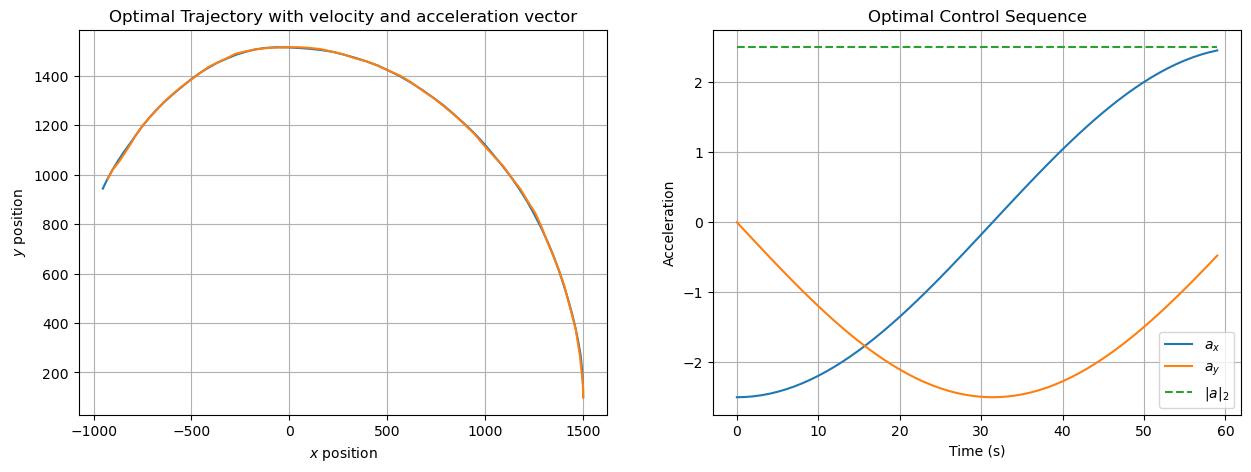

In [607]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.plot(muin[:,0], muin[:,1])
""" plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector """
plt.title("Optimal Trajectory with velocity and acceleration vector")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

In [608]:
position = states[:,0:2]
vel = states[:,2:4]
mean_p = muin[:,0:2]
mean_Vel = muin[:,2:4]
covarianceP=[]
covarianceVel=[]
for i in range(60):
    covarianceP.append(sigmin[i][0:2,0:2])
    covarianceVel.append(sigmin[i][2:4,2:4])


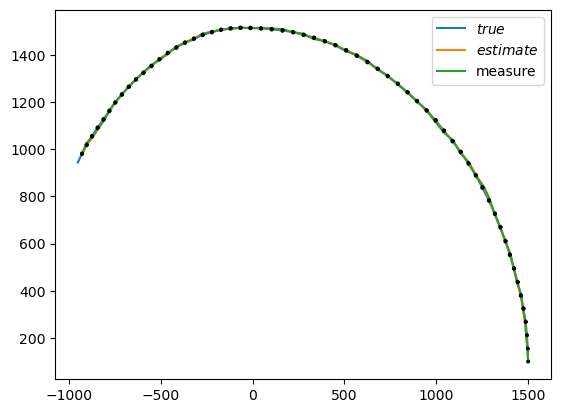

In [609]:
""" for (i,(u,v,p)) in enumerate(zip(mean_p, covarianceP, position)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p+u, v)
    plt.plot([p[0],p[0]+u[0]], [p[1],p[1]+u[1]], c="black") """
plt.plot(position[:,0], position[:,1])
plt.plot(mean_p[:,0], mean_p[:,1])
plt.plot(output[:,0], output[:,1])
plt.legend(["$true$", "$estimate$", "measure"])
for (i,(u,v,p)) in enumerate(zip(mean_p, covarianceP,position)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p, v)
    



#plt.scatter(position[:,0], position[:,1])

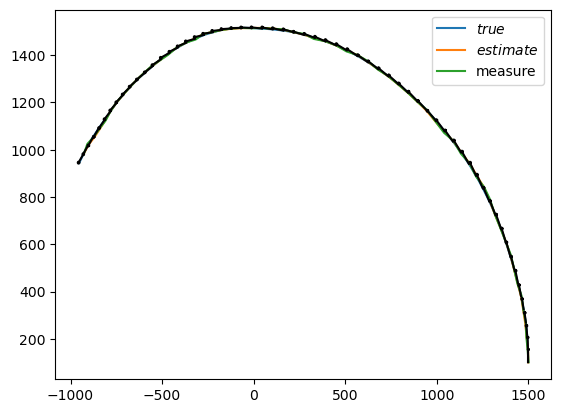

In [610]:
plt.plot(position[:,0], position[:,1])
plt.plot(mean_p[:,0], mean_p[:,1])
plt.plot(output[:,0], output[:,1])
plt.legend(["$true$", "$estimate$", "measure"])
for (i,(u,v,p)) in enumerate(zip(mean_Vel, covarianceVel, position)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p+u, v)
    plt.plot([p[0],p[0]+u[0]], [p[1],p[1]+u[1]], c="black")
    

In [611]:
dt = 1

A = np.array([[1, 0, dt, 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
B = np.array([[0.5*dt**2, 0], [0, 0.5*dt**2], [dt, 0], [0, dt]])
C = np.array([[0, 0, 1, 0], [0, 0, 0, 1]])

Q = np.diag([0,0,1,1])
R = 9*np.diag([1,1])
mean = np.array([0,0,0,0])
meany = np.array([0,0])


initial_state = np.array([1500, 100, 0, 55])

states = [initial_state]
controls = []
output = []
t = 0
t0 = t 

for i in range(60):
    W = np.random.multivariate_normal(mean, Q)
    V = np.random.multivariate_normal(meany, R) 
    controls.append( -2.5 * np.array([np.cos(0.05*t), np.sin(0.05*t)]))
    states.append(A @ states[i] + B @ controls[i] + W )
    output.append(C @ states[i] + V  )
    t += dt

controls = np.stack(controls)
states = np.stack(states)
output = np.stack(output)



In [614]:
muini = np.array([1500, 0, 0, 50])
sigmini = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
muin = [muini]
sigmin = [sigmini]
kk = []
for i in range(60):
    u = controls[i]
    y = output[i]
    kknx, munx, sigmnx = KF(A, B, C, u, y, QK, RK, muin[i], sigmin[i])
    kk.append(kknx)
    muin.append(munx)
    sigmin.append(sigmnx)



muin  = np.stack(muin)
kk  = np.stack(kk)
sigmin  = np.stack(sigmin)

In [615]:
position = states[:,0:2]
vel = states[:,2:4]
mean_p = muin[:,0:2]
mean_Vel = muin[:,2:4]
covarianceP=[]
covarianceVel=[]
for i in range(60):
    covarianceP.append(sigmin[i][0:2,0:2])
    covarianceVel.append(sigmin[i][2:4,2:4])

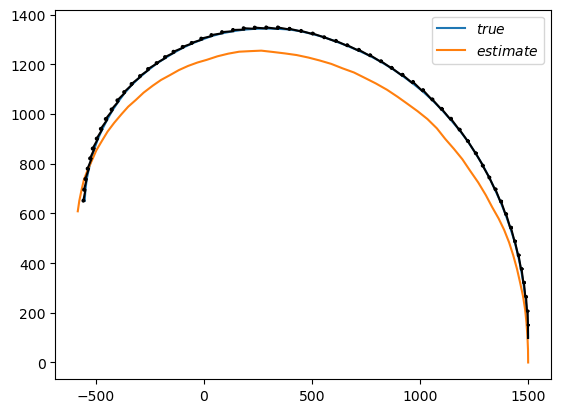

In [616]:
plt.plot(position[:,0], position[:,1])
plt.plot(mean_p[:,0], mean_p[:,1])
#plt.plot(output[:,0], output[:,1])
plt.legend(["$true$", "$estimate$", "measure"])
for (i,(u,v,p)) in enumerate(zip(mean_Vel, covarianceVel, position)):
    # plot mean and error ellipses of the velocity along the trajectory of the drone
    # (plotting them as vectors emanating from the quadrotor’s position)
    # with the ellipse centered at the tip of the vector).
    plot_95_ellipse(p+u, v)
    plt.plot([p[0],p[0]+u[0]], [p[1],p[1]+u[1]], c="black")